# Procesamiento de Señales en el dominio de la Frecuencia

## Ejemplo sencillo sobre una muestra de audio

In [1]:
# Archivos pueden arrastrarse al área de trabajo o procesarse en local

# Version Online
!wget https://github.com/AxelSkrauba/Taller_Signals/raw/main/2_Frecuencia/Audios_ejemplo.zip

--2023-08-30 20:25:52--  https://github.com/AxelSkrauba/Taller_Signals/raw/main/2_Frecuencia/Audios_ejemplo.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AxelSkrauba/Taller_Signals/main/2_Frecuencia/Audios_ejemplo.zip [following]
--2023-08-30 20:25:53--  https://raw.githubusercontent.com/AxelSkrauba/Taller_Signals/main/2_Frecuencia/Audios_ejemplo.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1339448 (1.3M) [application/zip]
Saving to: ‘Audios_ejemplo.zip’

Audios_ejemplo.zip  100%[===================>]   1.28M  --.-KB/s    in 0.008s  

2023-08-30 20:25:53 (156 MB/s) - ‘Audios_ejemplo

In [2]:
!unzip -qq Audios_ejemplo.zip

In [3]:
import numpy as np
import scipy.io.wavfile as waves
from IPython.display import Audio
import matplotlib.pyplot as plt

# INGRESO
archivo = 'G_1.wav'                   # Nombre del archivo
fs, grillo_1 = waves.read(archivo)    # fs: frecuencia de muestreo del archivo.

In [4]:
print(fs)
print(grillo_1.shape)   # Tamaño del vector, cantidad de muestras temporales

24000
(4638,)


In [5]:
# Reproducir el Audio
Audio(grillo_1, rate=fs)

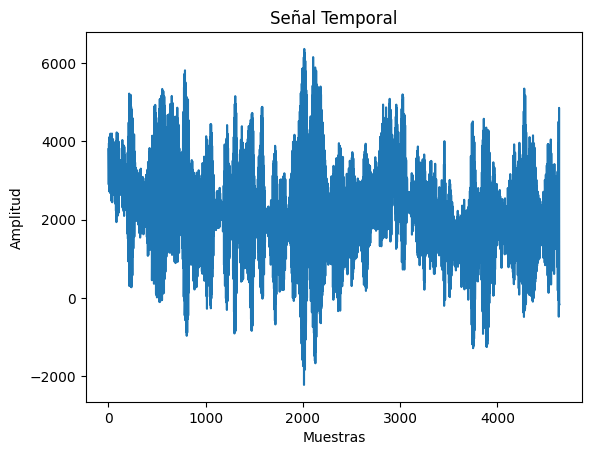

In [6]:
# Ejemplo de visualización de la señal en el tiempo
plt.plot(grillo_1)
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.title("Señal Temporal")
plt.show()

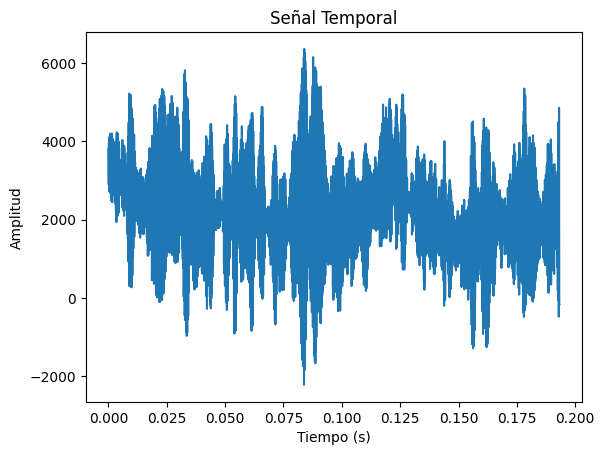

In [5]:
# Ejemplo de visualización de la señal en el tiempo
t = np.arange(0, len(grillo_1)/fs, 1/fs)        # Vector de tiempo para el eje X. (Inicio, Fin, Paso) = (0 s, tiempo total del audio, distancia entre muestras)

plt.plot(t, grillo_1)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal Temporal")
plt.show()

In [6]:
from scipy.fft import fft, fftfreq

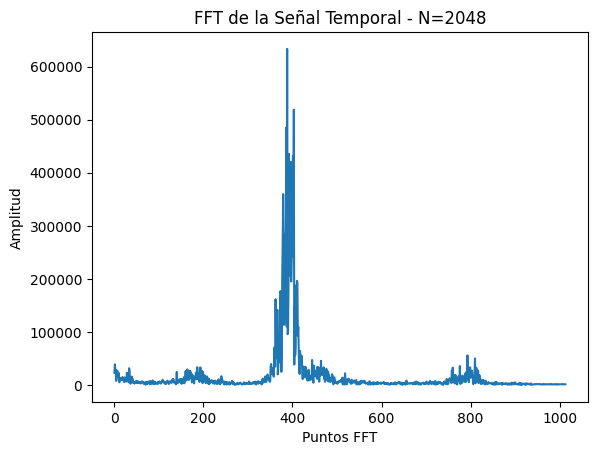

1024


In [7]:
N = 2048        # Puntos para la FFT
OFFSET = 10     # Para filtrar muy bajas frecuencias

signal_fft = fft(grillo_1, n=N)     # Se calcula la FFT

plt.plot(abs(signal_fft[OFFSET:len(signal_fft)//2]))
plt.xlabel("Puntos FFT")
plt.ylabel("Amplitud")
plt.title("FFT de la Señal Temporal - N={}".format(N))
plt.show()


print(len(signal_fft)//2)

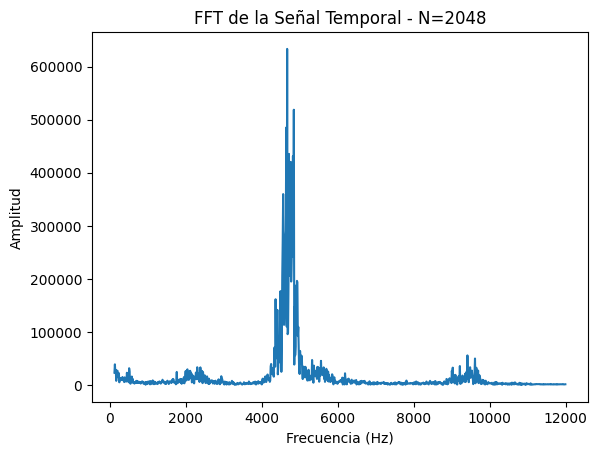

In [8]:
xf = fftfreq(N, 1/fs)           # Vector de frecuencias, para los bins de la FFT de N puntos calculada

plt.plot(xf[OFFSET:len(xf)//2], abs(signal_fft[OFFSET:len(signal_fft)//2]))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("FFT de la Señal Temporal - N={}".format(N))
plt.show()

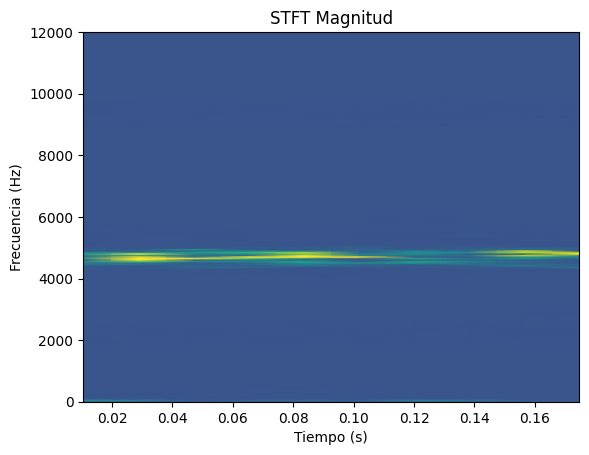

In [9]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(grillo_1, fs, nperseg=500)
plt.pcolormesh(t, f, Sxx, vmin=grillo_1.min(), vmax=grillo_1.max(), shading='gouraud')
plt.title('STFT Magnitud')
plt.ylabel('Frecuencia (Hz)')
plt.xlabel('Tiempo (s)')
plt.show()

In [38]:
def specgram2d(y, srate=fs, title=None):
    # Espectrograma con distribución de potencias
    ax = plt.axes()
    ax.set_title(title, loc='center', wrap=True)
    spec, freqs, t, im = ax.specgram(y, Fs=srate, scale='dB', vmax=100, noverlap=200)
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Frecuencia (Hz)')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Amplitud (dB)')
    cbar.minorticks_on()

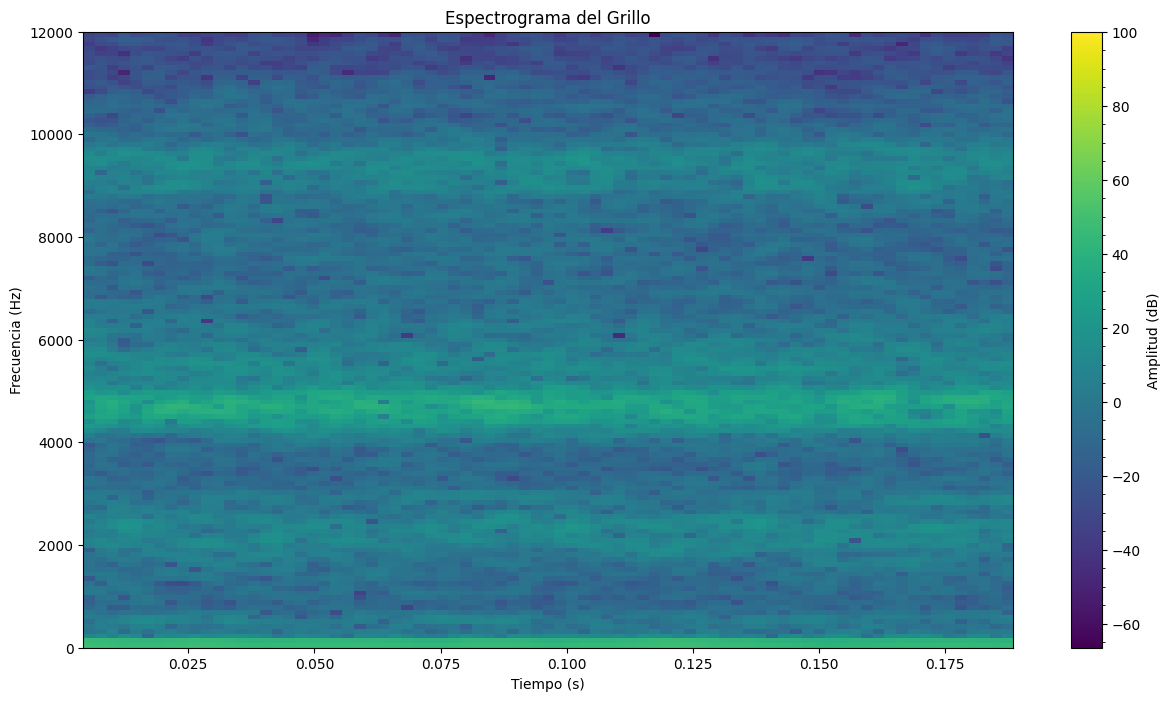

In [11]:
plt.figure(figsize=(15, 8))
specgram2d(grillo_1, srate=fs, title="Espectrograma del Grillo")
plt.show()

## Visualización sobre el Audio Completo

In [7]:
archivo = 'Audio_mono.wav'
fs, todo = waves.read(archivo)

In [8]:
# Reproducir el Audio
Audio(todo, rate=fs)

In [14]:
len(todo)

605779

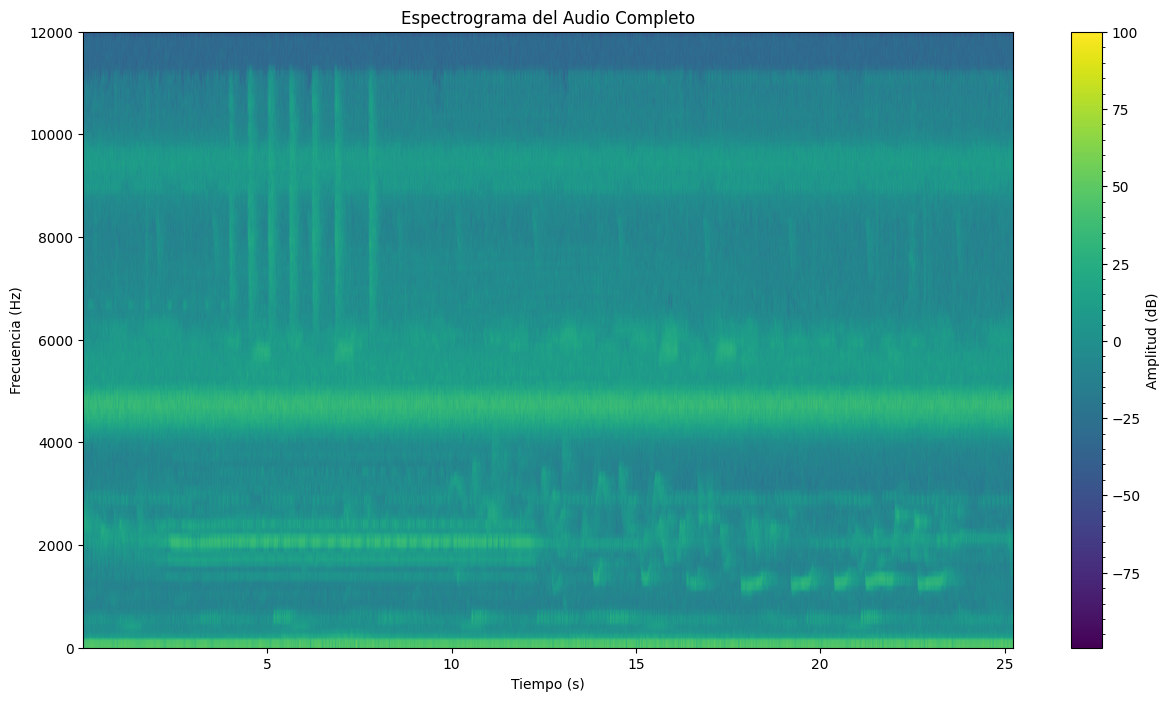

In [15]:
plt.figure(figsize=(15, 8))
specgram2d(todo, srate=fs, title="Espectrograma del Audio Completo")
plt.show()

# Filtros

In [86]:
import numpy as np
from scipy import signal

def filtro_pasa_bajos(datos, frecuencia_corte, frecuencia_muestreo, orden=10):
    """
    Aplica un filtro pasa bajos a una señal utilizando SciPy.

    Esta función aplica un filtro pasa bajos a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_corte : float
        La frecuencia de corte del filtro en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    orden : int
        El orden del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro pasa bajos.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro pasa bajos con frecuencia de corte de 100 Hz y orden 4 a la señal original
    frecuencia_corte = 100  # Frecuencia de corte en Hz
    orden = 4
    signal_filtrada = filtro_pasa_bajos(señal_original, frecuencia_corte, frecuencia_muestreo, orden)
    """
    nyquist_frecuencia = 0.5 * frecuencia_muestreo
    normal_frecuencia_corte = frecuencia_corte / nyquist_frecuencia
    b, a = signal.butter(orden, normal_frecuencia_corte, btype='low', analog=False)
    signal_filtrada = signal.lfilter(b, a, datos)
    return signal_filtrada


def filtro_pasa_altos(datos, frecuencia_corte, frecuencia_muestreo, orden=10):
    """
    Aplica un filtro pasa altos a una señal utilizando SciPy.

    Esta función aplica un filtro pasa altos a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_corte : float
        La frecuencia de corte del filtro en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    orden : int
        El orden del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro pasa altos.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro pasa altos con frecuencia de corte de 80 Hz y orden 4 a la señal original
    frecuencia_corte = 80  # Frecuencia de corte en Hz
    orden = 4
    signal_filtrada = filtro_pasa_altos(señal_original, frecuencia_corte, frecuencia_muestreo, orden)
    """
    nyquist_frecuencia = 0.5 * frecuencia_muestreo
    normal_frecuencia_corte = frecuencia_corte / nyquist_frecuencia
    b, a = signal.butter(orden, normal_frecuencia_corte, btype='high', analog=False)
    signal_filtrada = signal.lfilter(b, a, datos)
    return signal_filtrada


def filtro_pasa_banda(datos, frecuencia_corte_low, frecuencia_corte_high, frecuencia_muestreo, orden=10):
    """
    Aplica un filtro pasa banda a una señal utilizando SciPy.

    Esta función aplica un filtro pasa banda a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_corte_low : float
        La frecuencia de corte baja del filtro en hertz (Hz).
    frecuencia_corte_high : float
        La frecuencia de corte alta del filtro en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    orden : int
        El orden del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro pasa banda.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro pasa banda con frecuencias de corte baja y alta de 40 Hz y 60 Hz respectivamente, y orden 4 a la señal original
    frecuencia_corte_low = 40  # Frecuencia de corte baja en Hz
    frecuencia_corte_high = 60  # Frecuencia de corte alta en Hz
    orden = 4
    signal_filtrada = filtro_pasa_banda(señal_original, frecuencia_corte_low, frecuencia_corte_high, frecuencia_muestreo, orden)
    """
    nyquist_frecuencia = 0.5 * frecuencia_muestreo
    normal_frecuencia_corte_low = frecuencia_corte_low / nyquist_frecuencia
    normal_frecuencia_corte_high = frecuencia_corte_high / nyquist_frecuencia
    b, a = signal.butter(orden, [normal_frecuencia_corte_low, normal_frecuencia_corte_high], btype='band', analog=False)
    signal_filtrada = signal.lfilter(b, a, datos)
    return signal_filtrada


def filtro_elimina_banda(datos, frecuencia_corte_low, frecuencia_corte_high, frecuencia_muestreo, orden=10):
    """
    Aplica un filtro elimina banda a una señal utilizando SciPy.

    Esta función aplica un filtro elimina banda a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_corte_low : float
        La frecuencia de corte baja del filtro en hertz (Hz).
    frecuencia_corte_high : float
        La frecuencia de corte alta del filtro en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    orden : int
        El orden del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro elimina banda.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro elimina banda con frecuencias de corte baja y alta de 45 Hz y 55 Hz respectivamente, y orden 4 a la señal original
    frecuencia_corte_low = 45  # Frecuencia de corte baja en Hz
    frecuencia_corte_high = 55  # Frecuencia de corte alta en Hz
    orden = 4
    signal_filtrada = filtro_elimina_banda(señal_original, frecuencia_corte_low, frecuencia_corte_high, frecuencia_muestreo, orden)
    """
    nyquist_frecuencia = 0.5 * frecuencia_muestreo
    normal_frecuencia_corte_low = frecuencia_corte_low / nyquist_frecuencia
    normal_frecuencia_corte_high = frecuencia_corte_high / nyquist_frecuencia
    b, a = signal.butter(orden, [normal_frecuencia_corte_low, normal_frecuencia_corte_high], btype='bandstop', analog=False)
    signal_filtrada = signal.lfilter(b, a, datos)
    return signal_filtrada


def filtro_notch(datos, frecuencia_central, frecuencia_muestreo, quality=30):
    """
    Aplica un filtro notch (rechazo de banda) a una señal utilizando SciPy.

    Este filtro es útil para eliminar componentes en una frecuencia específica y
    su alrededor, útil por ejemplo para eliminar ruido proveniente de una interferencia (50 Hz de la red, por ejemplo).

    Esta función aplica un filtro notch a una señal dada utilizando la biblioteca SciPy.

    Parámetros:
    ----------
    datos : array NumPy
        Un array NumPy que contiene la señal original.
    frecuencia_central : float
        La frecuencia central del filtro notch en hertz (Hz).
    frecuencia_muestreo : float
        La frecuencia de muestreo de los datos en hertz (Hz).
    quality : int
        Factor de calidad del filtro.

    Retorna:
    -------
    array NumPy
        Un array NumPy que contiene la señal filtrada mediante el filtro notch.

    Ejemplos:
    --------
    # Crear una señal con datos de ejemplo
    frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
    tiempo = np.arange(0, 1, 1 / frecuencia_muestreo)
    señal_original = np.sin(2 * np.pi * 50 * tiempo) + np.random.normal(0, 0.5, tiempo.shape)

    # Aplicar un filtro notch con frecuencia central de 50 Hz, y factor de calidad 4 a la señal original
    frecuencia_central = 50  # Frecuencia central en Hz
    quality = 4
    signal_filtrada = filtro_notch(señal_original, frecuencia_central, frecuencia_muestreo, quality)
    """
    b, a = signal.iirnotch(frecuencia_central, quality, frecuencia_muestreo)
    signal_filtrada = signal.filtfilt(b, a, datos)
    return signal_filtrada

# Pruebas de Filtrado

Borramos los grillos que están en todo el audio, poco arriba de los 4000 Hz.

In [18]:
todo_fil_elim_banda = filtro_elimina_banda(todo, frecuencia_corte_low=4000, frecuencia_corte_high=5500, frecuencia_muestreo=fs, orden=5)

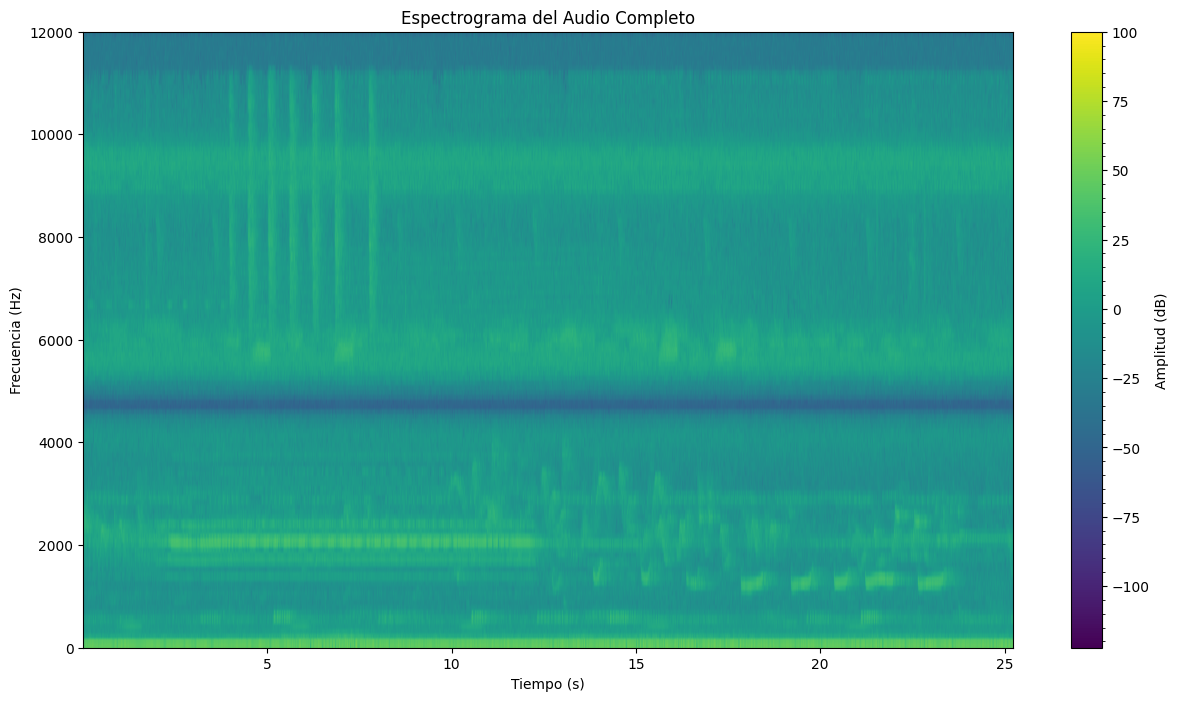

In [19]:
plt.figure(figsize=(15, 8))
specgram2d(todo_fil_elim_banda, srate=fs, title="Espectrograma del Audio Completo")
plt.show()

In [20]:
# Reproducir el Audio Filtrado
Audio(todo_fil_elim_banda, rate=fs)

In [93]:
todo_fil_chicharra = filtro_notch(todo_fil_elim_banda, frecuencia_central=2000, frecuencia_muestreo=fs, quality=5) # Calidad más alta, quita puntualmente esa frecuencia.

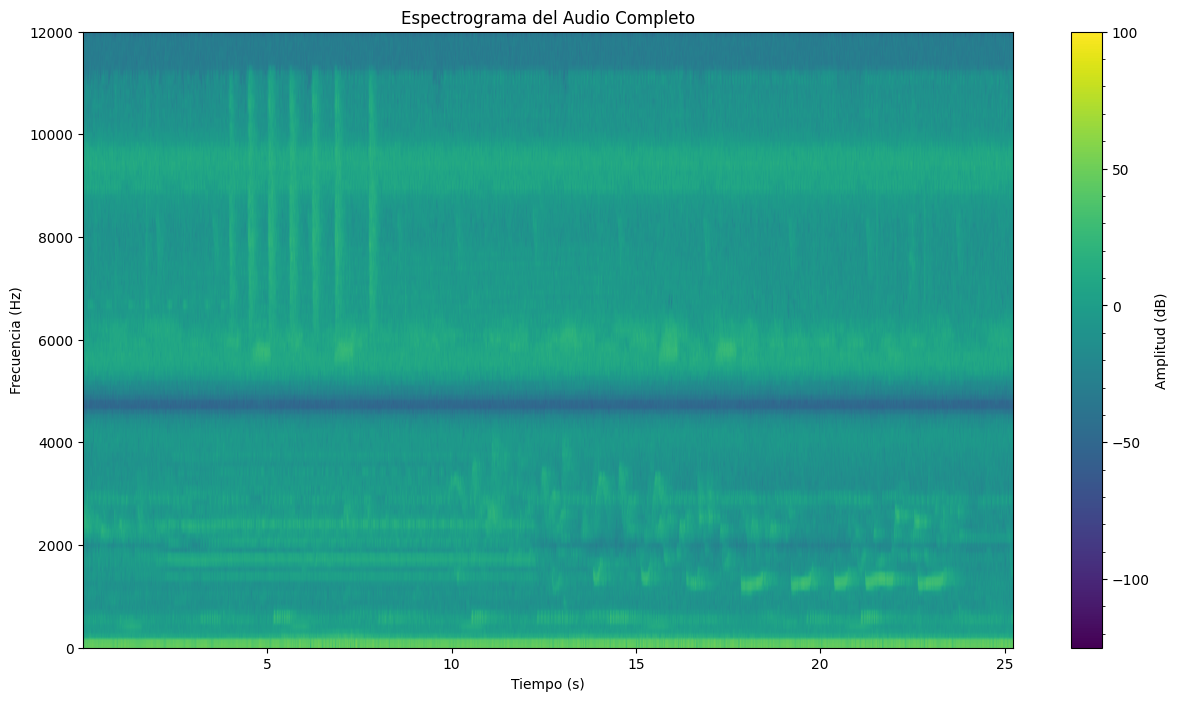

In [94]:
plt.figure(figsize=(15, 8))
specgram2d(todo_fil_chicharra, srate=fs, title="Espectrograma del Audio Completo")
plt.show()

In [95]:
# Reproducir el Audio Filtrado
Audio(todo_fil_chicharra, rate=fs)

## Guardar archivo procesado

In [78]:
from scipy.io.wavfile import write

write("example.wav", fs, todo_fil_chicharra.astype(np.int16))

# Para Archivos *.mp3*

In [9]:
!pip install audio2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=18584b73267028c8193fd2280823e9809cfa7c8e97b32b84a62963546fe6d60c
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [12]:
import audio2numpy as a2n

wav_data, sample_rate = a2n.audio_from_file("insectos.mp3")

# Información básica del archivo.
duration = len(wav_data)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(wav_data)}')

Sample rate: 48000 Hz
Total duration: 10.06s
Size of the input: 482688


In [13]:
wav_data.shape   # Tiene 2 canales de audio, stereo. Lo casi normal hoy en día

(482688, 2)

In [33]:
wav_data_1 = wav_data[:,0]  # Agarramos 1

In [24]:
wav_data_1.shape

(482688,)

In [34]:
Audio(wav_data_1, rate=sample_rate)

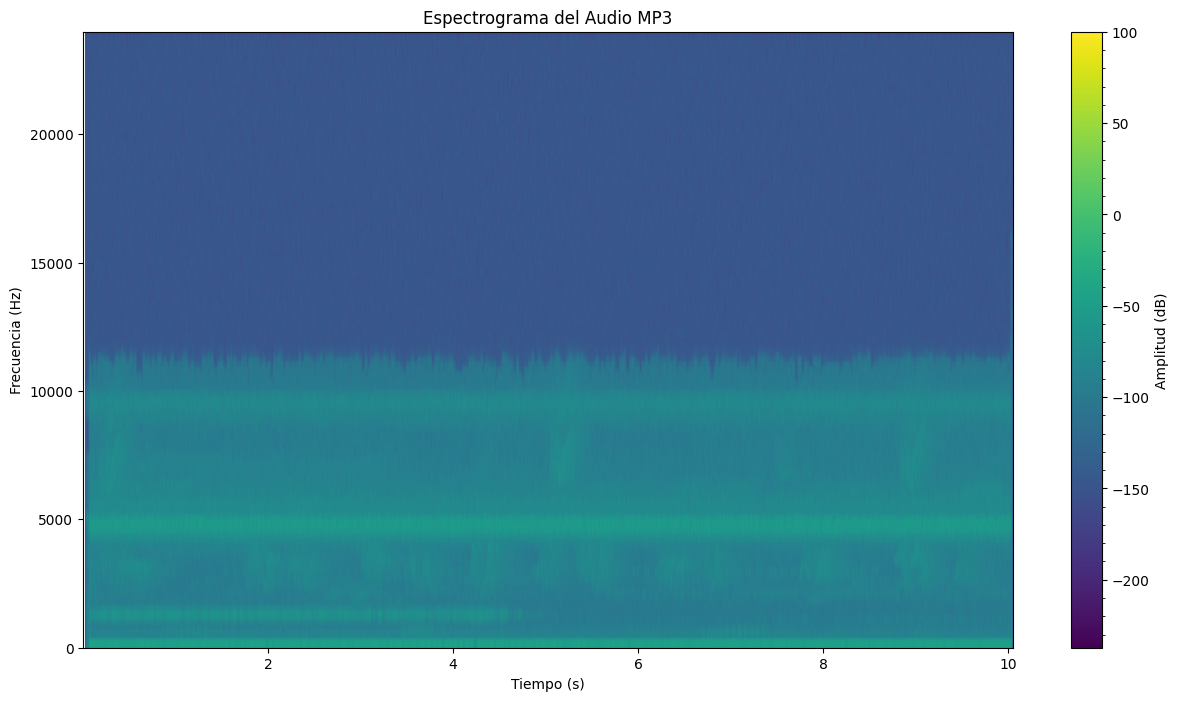

In [39]:
plt.figure(figsize=(15, 8))
specgram2d(wav_data_1, srate=sample_rate, title="Espectrograma del Audio MP3")
plt.show()